In [8]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Practice 3: Making a raster plot

## Download data

Download data from the file **Practice 3_data1.csv** into dataframe called **df1**. Print first six line of the dataframe. It should look like this:

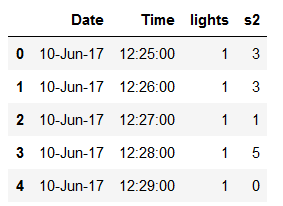

In [10]:
df = pd.read_csv('Practice 3_data1.csv')
display(df.head())

,Date,Time,lights,s2
0,10-Jun-17,12:25:00,1,3
1,10-Jun-17,12:26:00,1,3
2,10-Jun-17,12:27:00,1,1
3,10-Jun-17,12:28:00,1,5
4,10-Jun-17,12:29:00,1,0


## Experiment 1: Visual inspection of your data

Add a column to your dataframe **df1** called **time_min** which contains time(in minutes) from the begining of the experiment. Print first few lines of a dataframe. It should look like this:

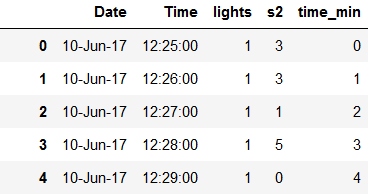

In [12]:
df['time_min'] = range(0, len(df.index))
display(df.head())

,Date,Time,lights,s2,time_min
0,10-Jun-17,12:25:00,1,3,0
1,10-Jun-17,12:26:00,1,3,1
2,10-Jun-17,12:27:00,1,1,2
3,10-Jun-17,12:28:00,1,5,3
4,10-Jun-17,12:29:00,1,0,4


Plot your data in two subplot: the first subplot should have a light. Follow format for data labeling (colors, axis labels, etc) shown in the graph below.

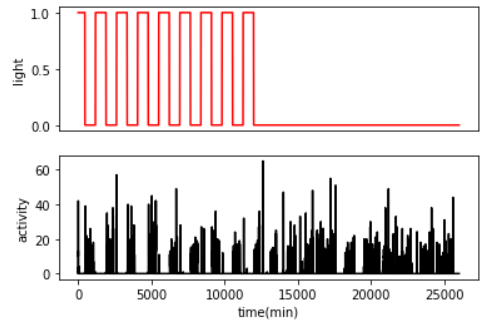

Text(0, 0.5, 'activity')

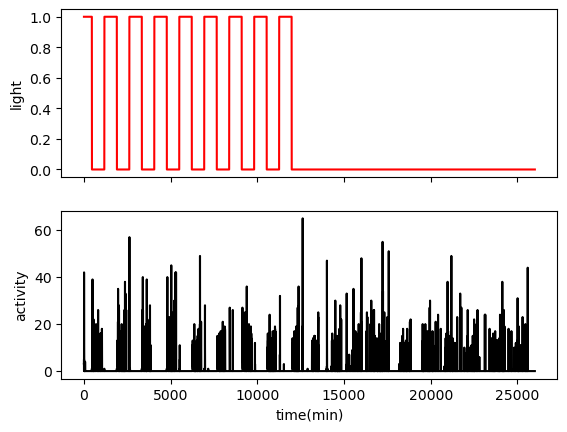

In [34]:
fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].plot(df.time_min, df.lights, c = 'r')
axs[0].set_ylabel('light')
axs[1].plot(df.time_min, df.s2, c = 'black')
axs[1].set_xlabel('time(min)')
axs[1].set_ylabel('activity')

###  Plot activity for the first 24 hours

First activity for first 24 hours of the recordings for light and activity. The upper panel (light) should not have any x-axis label. The bottom panel should have x-axis labeled in hours. You should have a graph like this:

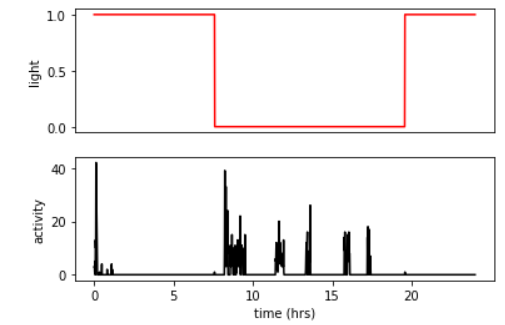

Text(0, 0.5, 'activity')

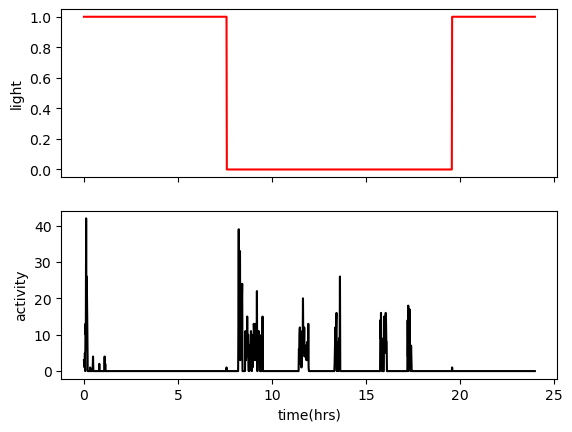

In [46]:
fig, axs = plt.subplots(2, 1, sharex = True)
label = ['0', "5", '10', '15', '20']

df_min = df.time_min[0:1440]
df_hours = [x / 60 for x in df_min]

axs[0].plot(df_hours, df.lights[0:1440], c = 'r')
#axs[0].set_xticks(label)
axs[0].set_ylabel('light')
axs[1].plot(df_hours, df.s2[0:1440], c = 'black')
axs[1].set_xlabel('time(hrs)')
axs[1].set_ylabel('activity')

## Experiment 3: Make a raster plot

Now make a raster plot for activity of spider s2. Plot activity for every 24 hours in the panels arranged vertically.Label y-axis of each panel with a day number (d1, for day 1 of recordings, d2 for second day or recordings, etc. Only bottom panel should have x-axis labeled in hours. Your graph should look like this:


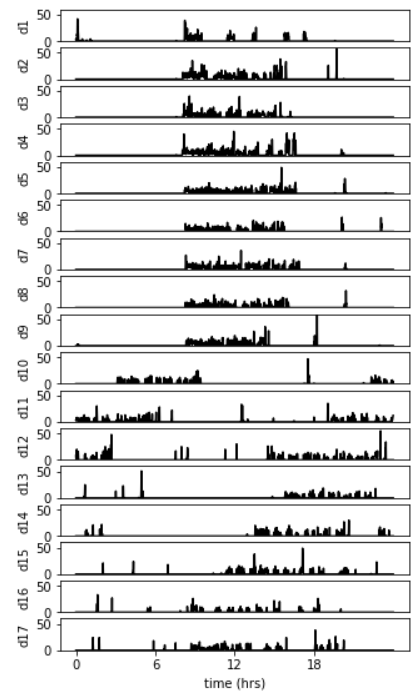

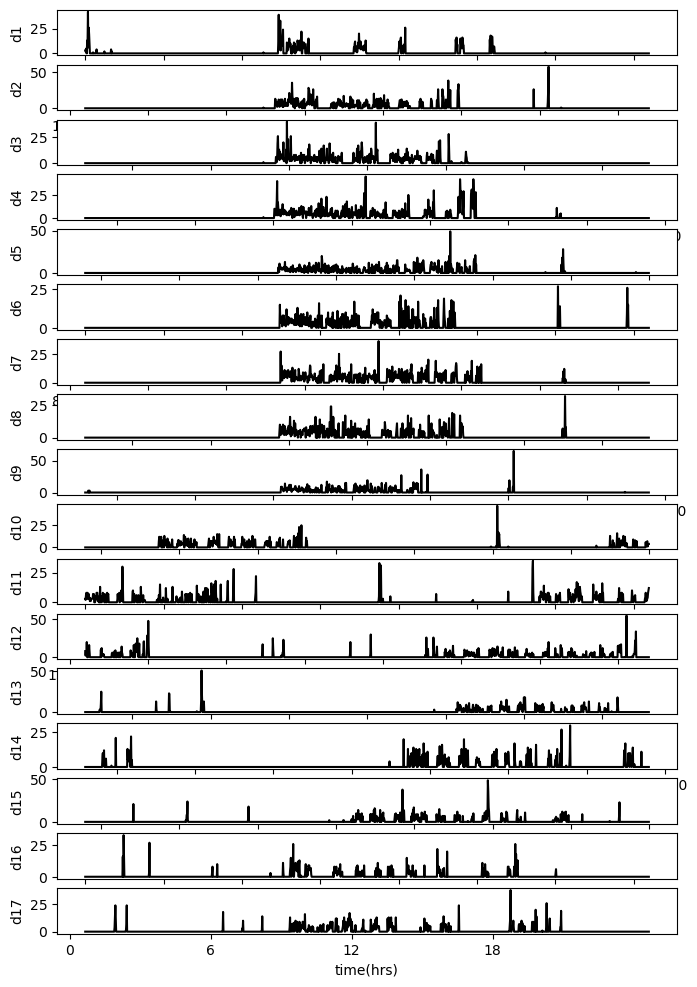

In [52]:

a = len(df.index)
b = a//1440
fig, axs = plt.subplots(b-1, 1, figsize = (8,12))

for i in range(0,b-1):
    axs[i].plot(df.time_min[1440*i:1440*(i + 1)], df.s2[1440*i:1440*(i + 1)], c = 'black')
    axs[i].set_xlabel('time(hrs)')
    axs[i].set_ylabel('d' + str(i+1))
    
plt.setp(axs[b-2], xticks=[23000, 23360, 23720, 24080], xticklabels = ['0', '6', '12', '18'])
plt.show()

## Experiment 4: Make a double raster plot

Now make a double raster plot. That is the first(top) pannel of your graph should have activity for first 48 hours. The second panel should have activity for hours 24-72. The third pannel hours 48-96, etc. Your plot should look like this:

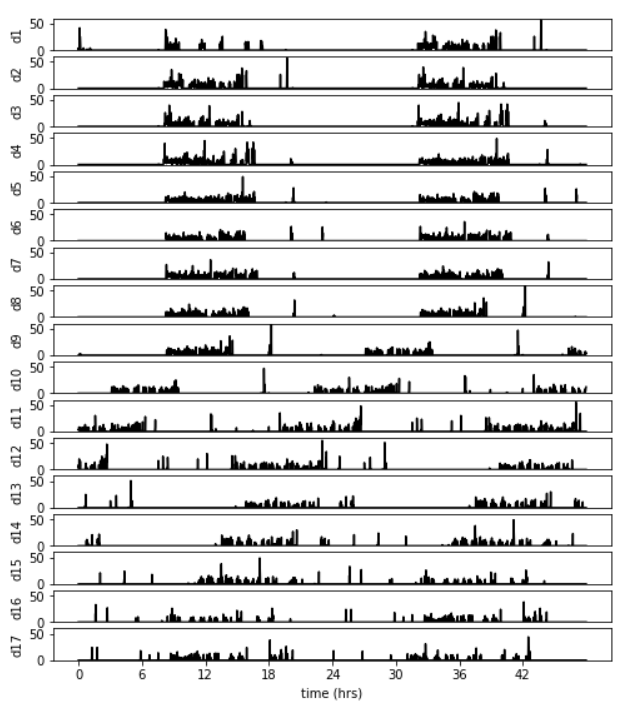

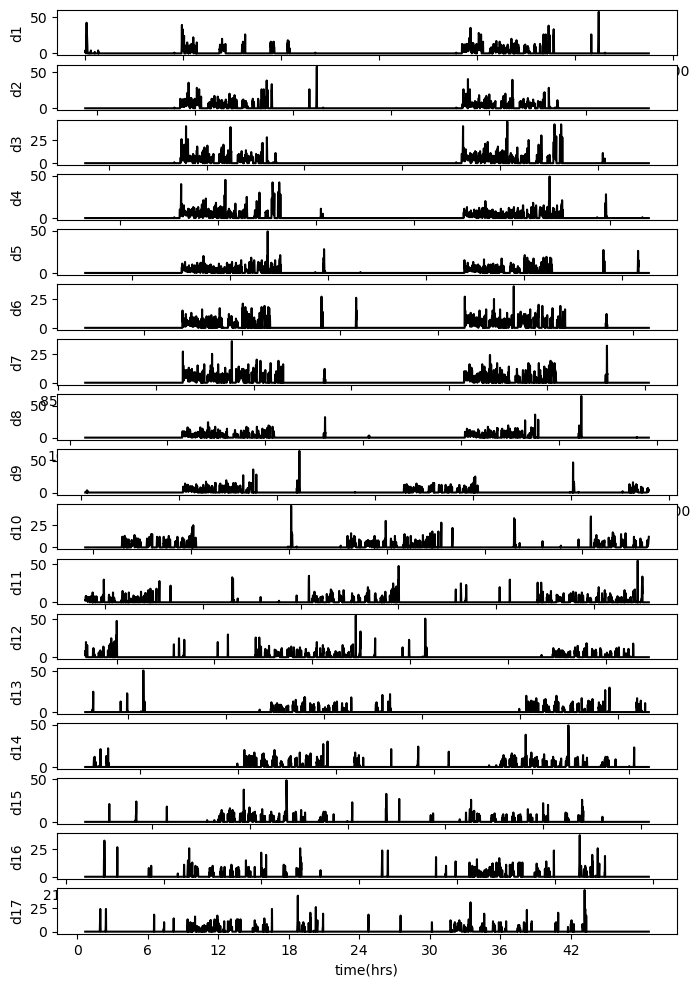

In [54]:
a = len(df.index)
b = a//1440
fig, axs = plt.subplots(b-1, 1, figsize = (8,12))

for i in range(0,b-1):
    axs[i].plot(df.time_min[1440*i:1440*(i + 2)], df.s2[1440*i:1440*(i + 2)], c = 'black')
    axs[i].set_xlabel('time(hrs)')
    axs[i].set_ylabel('d' + str(i+1))
    

plt.setp(axs[b-2], xticks=[23000, 23360, 23720, 24080, 24440, 24800, 25160, 25520], xticklabels = ['0', '6', '12', '18','24', '30', '36', '42', ])
plt.show()

## Experiment 5: Using raster plot to estimate Free Running period

In circadian biology, the concept of **free running period** is an essential one. We say that the animal is free running when it maintain a stable period of activity in a constant darkness. For our experimental analysis we should be able to estimate if animal is rhythmic in constant darkness and estimate a period of such activity. The goal of this experiment is to develop a function which deterimine if animal is rhythmic in a constant darkness. That is, if funciton return True then the spider is rhythmic in the dark. If funciton return False, the spider is not rhythmic. In the space below please develop a brief research report which introduce a concept of free-running period, implement your concept in a python function and test your function on spider s2. The report should include:

   - Short biological description of free-running period
        - with citation of at least 3 peer-reviewed articles
    - Clear definition of periodicity applied to a locomotor activity
        - provide a clear criteria for a time series which is periodic
    - Separate for implementation of each individual criteria(s) described above
        - should be supported by visualization(s)
    - Function which implement your criteria(s) to each individual spider
    - Brief comment/critique of your methodology. What caveats you might anticipate?